In [1]:
import pandas as pd
df1 = pd.read_csv("../data/raw/Bengaluru_House_Data 2.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
# The order should be as below. But ig there were changes in the order I followed in this project. Note: Data analysis should be done after data cleaning.
    # load dataset
    # Data cleaning
    # data analysis
    # feature selection and data transformation

In [3]:
df1.duplicated().sum()

df1.columns
categorical_cols = ['area_type', 'availability','society','size']
for i in categorical_cols:
    print(i)
    print(df1[i].unique())
    print()

area_type
['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

availability
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']

society
['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']

size
['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'


In [4]:
df1['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#Since our data is not is numerical form(ex: area_type is not in as 0,1,2,3 but as words), we can easily understand what the data means

In [7]:


df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
# Make pie charts for each feature with the target in here






# Imp Notes

## When do df1.head(), we can see
size col has bhk stuff.
    We need to adjust that
society col has null values

## Now for each col, do "df1['col'].unique()". If need, do "len(df1['col'].unique())"
    ## Since the output is huge, editor shows "..." noh. Don't buy it. Go to the csv file and try to get an idea.
area_type col has 4 values
availability col has [19-Dec, Ready To Move, Immediate Possession]
    Q: In here, we need to look for imbalances?
    A: 
location is obviously having as we think
total_sqft has decimals, ranges, whole values.
bath has nan
balcony has nan
price 

Q: So for nan, when do isnull, 
    if the count is huge, we remove that col. 
    if the count is less, we remove those rows

In [9]:
print(df1.shape)
print(df1.isnull().sum())

#Since the society col has many null values, we are dropping that col
df2 = df1.drop(['society'], axis = 1)
print(df2.shape)
print(df2.isnull().sum())

#Since 
    # location has only 1 null value,
    # size has only 16 null values,
    # bath has 73 null values,
    # balcony has 609 null values,
        #we are going to drop those rows
df3 = df2.dropna()
print(df3.shape)
print(df3.isnull().sum())



(13320, 9)
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64
(13320, 8)
area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64
(12710, 8)
area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


# size col to needed way

In [10]:
# df3['size'][0].split(' ')[0]
def splitter(x):
    return x.split(' ')[0]

df3['bhk'] = df3['size'].apply(splitter)

C:\Users\HP\AppData\Local\Temp\ipykernel_26848\586080842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(splitter)


In [11]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


# total_sqft column adjusting

In [12]:
from statistics import mean 

def total_sqft_col_adjuster(x):
    for i in x:
        if i == '-':
            l = x.split('-')
            nl = [float(i) for i in l]
            return float(mean(nl))
    if "Sq. Meter" in x:
        #Do the Sq. Meter to sqft in here
        return float(x.replace("Sq. Meter", ""))
    if "Sq. Yards" in x:
        #Do the ...
        return float(x.replace("Sq. Yards", ""))
    if "Acres" in x:
        #Do the ...
        return float(x.replace("Acres", ""))
    if "Cents" in x:
        #Do the ...
        return float(x.replace("Cents", ""))
    if "Grounds" in x:
        #Do the ...
        return float(x.replace("Grounds", ""))
    if "Guntha" in x:
        #Do the ...
        return float(x.replace("Guntha", ""))
    if "Perch" in x:
        #Do the ...
        return float(x.replace("Perch", ""))
    return float(x)
    

            
print(total_sqft_col_adjuster('2100 - 2850'))
# print(total_sqft_col_adjuster('1000Sq. Meter'))
# print(total_sqft_col_adjuster('1100Sq. Yards'))
# print(total_sqft_col_adjuster('30Acres'))
# print(total_sqft_col_adjuster('3Cents'))
# print(total_sqft_col_adjuster('1Grounds'))
# print(total_sqft_col_adjuster('38Guntha'))

2475.0


In [13]:
#Creating new_total_sqft col to store all the valid results for total_sqft
df3['new_total_sqft'] = df3['total_sqft'].apply(total_sqft_col_adjuster)

C:\Users\HP\AppData\Local\Temp\ipykernel_26848\1864907467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['new_total_sqft'] = df3['total_sqft'].apply(total_sqft_col_adjuster)


In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

#This is after creating the new_total_sqft. It has nothing.

df3[~df3['new_total_sqft'].apply(is_float)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft


In [15]:
df3.head()
# df3.columns

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


# Imp Notes

Now see for business stuff FOR THE COLUMNS
Extra: Try to implement them
    https://chatgpt.com/c/66efd2c2-2554-8009-b9e4-5755944edefb
        Spotting Low variance features: https://chatgpt.com/c/66efd2c2-2554-8009-b9e4-5755944edefb#:~:text=Low%2Dvariance%20features%20are%20columns
        price per sqft feature: https://chatgpt.com/c/66efd2c2-2554-8009-b9e4-5755944edefb#:~:text=Price%20per%20square%20foot%20(price%20per%20unit%20area)
        Location-Specific Models: https://chatgpt.com/c/66efd2c2-2554-8009-b9e4-5755944edefb#:~:text=Location%2DSpecific%20Models

__From the vid, we found__
Inorder to drop the low variance features, we find the value_counts
Created pps feature(as C suggested)
Since, we are not going to make different models for different locations, let's reduce the locations by where count each location is referred to, is less than 10
    dimentionality reduction for location column   
remove houses where the size of 1 room is less than 300
remove pps outliers
remove 2bhk houses where the price of them are higher than 3bhk houses
removing houses where the bath count is 2 more than the room count

In [16]:
# Drop irrelevant or low-variance features:
for i in df3.columns:
    print(df3[i].value_counts(normalize=True))
#So from the output, we can see, we can drop
    # availability. The reason is, the "Ready To Move" value dominates others
df3 = df3.drop(['availability'], axis = 1)

area_type
Super built-up  Area    0.667270
Built-up  Area          0.181747
Plot  Area              0.144532
Carpet  Area            0.006452
Name: proportion, dtype: float64
availability
Ready To Move    0.792840
18-Dec           0.022895
18-May           0.022187
18-Apr           0.020535
18-Aug           0.015736
                   ...   
15-Dec           0.000079
20-Feb           0.000079
16-Jul           0.000079
14-Nov           0.000079
14-Jul           0.000079
Name: proportion, Length: 78, dtype: float64
location
Whitefield            0.040441
Sarjapur  Road        0.029268
Electronic City       0.023603
Kanakpura Road        0.020535
Thanisandra           0.018175
                        ...   
Milk Colony           0.000079
Sundara Nagar         0.000079
Jaladarsini Layout    0.000079
Madanayakahalli       0.000079
Abshot Layout         0.000079
Name: proportion, Length: 1265, dtype: float64
size
2 BHK         0.405350
3 BHK         0.324784
4 Bedroom     0.058930
1 BHK     

In [17]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


In [18]:
df3['location'].value_counts()

location_and_counts_dictionary = dict()
unique_locations = df3['location'].value_counts().keys().tolist()
counts = df3['location'].value_counts().tolist()
for i,j in zip(unique_locations,counts):
    location_and_counts_dictionary.update({i:j})
# location_and_counts_dictionary
print(len(unique_locations))

print(len(location_and_counts_dictionary))

# location_and_counts_dictionary

locations_that_count_less_than_10 = []
locations_that_count_not_lessThan10 = []
for i in location_and_counts_dictionary:
    if location_and_counts_dictionary[i] < 10:
        # print(i," ", location_and_counts_dictionary[i])
        locations_that_count_less_than_10.append(i)
    else:
        locations_that_count_not_lessThan10.append(i)

print(len(locations_that_count_less_than_10))
print(len(locations_that_count_not_lessThan10))

def namer(location):
    for i in locations_that_count_less_than_10:
        if location==i:
            return "Other"
        
    return location

df3['location_new'] = df3['location'].apply(namer)

df3['location_new'].value_counts()
#So we had 1304 unique locations
#Out of them, 
   # 1051 were the ones which had counts < 10
   # 253 were the ones which had counts >= 10
#So when all 1051 were labeled as "Other", now the 253 be 254. Done





1265
1265
1018
247


location_new
Other              2654
Whitefield          514
Sarjapur  Road      372
Electronic City     300
Kanakpura Road      261
                   ... 
Gunjur Palya         10
Ganga Nagar          10
Dairy Circle         10
HAL 2nd Stage        10
Kodigehalli          10
Name: count, Length: 248, dtype: int64

In [19]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0,Electronic City Phase II
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0,Chikka Tirupathi
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0,Uttarahalli
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0,Lingadheeranahalli
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0,Kothanur


In [20]:

df3['bhk_float'] = df3['bhk'].apply(lambda x: float(x))
df3.head()
df3[df3['new_total_sqft']/df3['bhk_float'] < 300]

# Helpers
# def unit_sqft_namer(x):
#     print(type(x))
# df3['bhk'].apply(unit_sqft_namer)
# df3['bhk_float'].apply(unit_sqft_namer)

df3 = df3[~ (df3['new_total_sqft']/df3['bhk_float'] < 300)]

In [21]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0,Electronic City Phase II,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0,Chikka Tirupathi,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0,Uttarahalli,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0,Lingadheeranahalli,3.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0,Kothanur,2.0


In [22]:
import numpy as np
# https://chatgpt.com/c/66efd2c2-2554-8009-b9e4-5755944edefb#:~:text=Price%20per%20square%20foot%20(price%20per%20unit%20area)
df3["Price per sqft"] = (df3["price"]*100000)/(df3["new_total_sqft"])


df3['Price per sqft'].head()

df3['Price per sqft'].describe()

print(df3.head(10))
def removing_pps_outliers(df):
    df_out = pd.DataFrame()
    for i,j in df.groupby('location_new'):
        # print(i)
        # print("--")
        mean = np.mean(j['Price per sqft'])
        std =  np.std(j['Price per sqft'])
        rows_of_current_location_that_are_not_outliers = j[(j['Price per sqft']> ( mean-std)) & (j['Price per sqft'] <= (mean+std))]       
        # print(df_out.head())
        # print("--")
        # print(j.head(6))
        # print("--")
        # print(rows_of_current_location_that_are_not_outliers.head())
        # print("--")
        df_out = pd.concat([df_out, rows_of_current_location_that_are_not_outliers], ignore_index=True)
        # print(df_out.head())
        # print("-- Wehave removed the row with pps=13333")
    return df_out



df3 = removing_pps_outliers(df3)
print(df3.head(10))
df3.shape

               area_type                  location       size total_sqft  \
0   Super built-up  Area  Electronic City Phase II      2 BHK       1056   
1             Plot  Area          Chikka Tirupathi  4 Bedroom       2600   
2         Built-up  Area               Uttarahalli      3 BHK       1440   
3   Super built-up  Area        Lingadheeranahalli      3 BHK       1521   
4   Super built-up  Area                  Kothanur      2 BHK       1200   
5   Super built-up  Area                Whitefield      2 BHK       1170   
8   Super built-up  Area              Marathahalli      3 BHK       1310   
10  Super built-up  Area                Whitefield      3 BHK       1800   
11            Plot  Area                Whitefield  4 Bedroom       2785   
12  Super built-up  Area        7th Phase JP Nagar      2 BHK       1000   

    bath  balcony   price bhk  new_total_sqft              location_new  \
0    2.0      1.0   39.07   2          1056.0  Electronic City Phase II   
1    5.0     

(9833, 12)

In [23]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float,Price per sqft
0,Super built-up Area,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,3,1250.0,Devarachikkanahalli,3.0,3520.000000
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0,3200.000000
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0,6916.666667
3,Super built-up Area,Devarachikkanahalli,2 BHK,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0,3418.803419
4,Super built-up Area,Devarachikkanahalli,3 BHK,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0,4561.403509


In [24]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

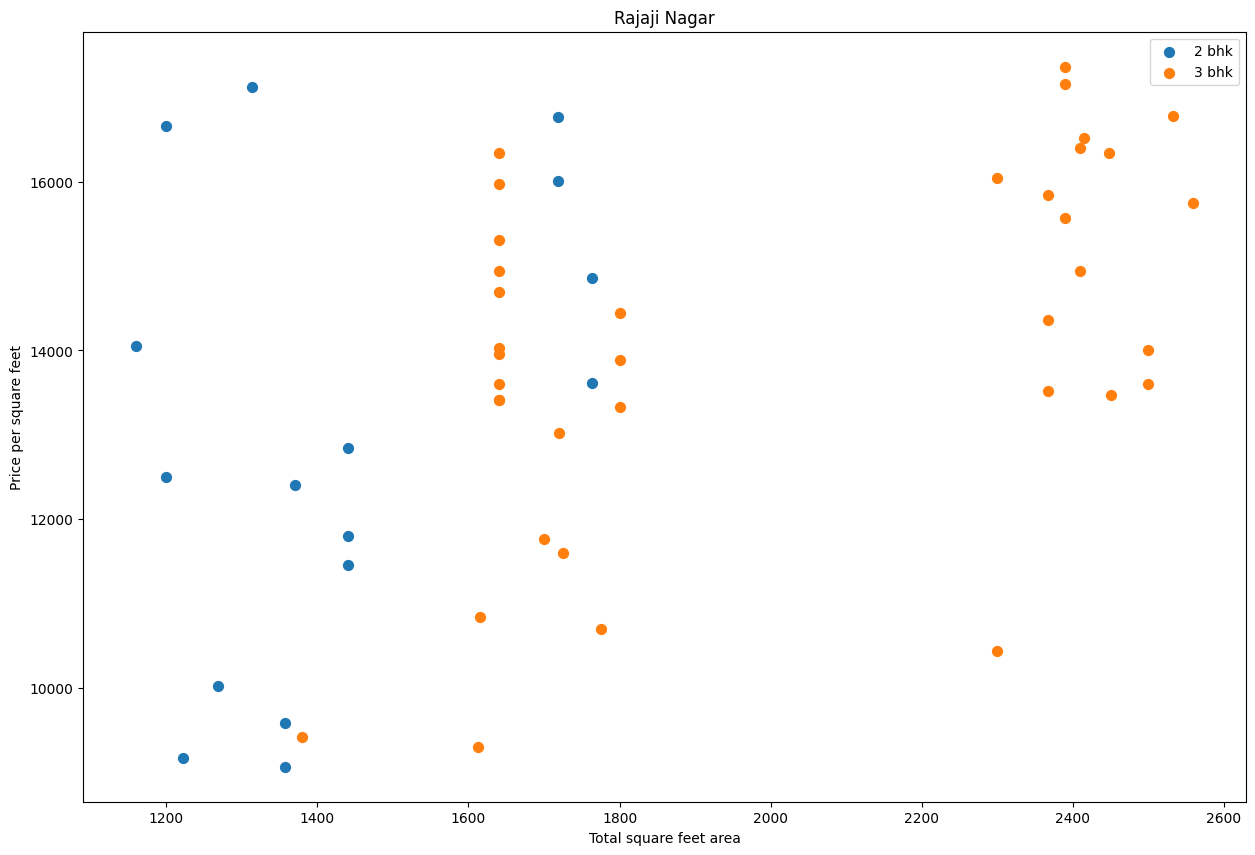

In [25]:
def plot_scatter_plot(df, location):
    bhk_2 = df[(df["location_new"]==location)&(df.bhk=='2')]
    bhk_3 = df[(df["location_new"]==location)&(df.bhk=='3')]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk_2['new_total_sqft'] ,bhk_2['Price per sqft'], label='2 bhk' , s=50)
    plt.scatter(bhk_3['new_total_sqft'] ,bhk_3['Price per sqft'], label='3 bhk' , s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price per square feet")
    plt.title(location)
    plt.legend()

plot_scatter_plot(df3, 'Rajaji Nagar')

In [26]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float,Price per sqft
0,Super built-up Area,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,3,1250.0,Devarachikkanahalli,3.0,3520.000000
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0,3200.000000
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0,6916.666667
3,Super built-up Area,Devarachikkanahalli,2 BHK,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0,3418.803419
4,Super built-up Area,Devarachikkanahalli,3 BHK,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0,4561.403509


In [27]:
def remove_bhk_outliers(df):
    to_exclude_indexes = np.array([])
    for location, location_df in df.groupby('location_new'):
        # print(location_df)
        bhk_stats = dict()
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df['Price per sqft']),
                "std": np.std(bhk_df['Price per sqft']),
                "count": bhk_df.shape[0]
            }
        # print(bhk_stats)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(str(int(bhk)-1))
            if stats and stats['count']>5:
                # print(bhk_df['location'].index.values)
                to_exclude_indexes = np.append(to_exclude_indexes, bhk_df[bhk_df["Price per sqft"]<(stats['mean'])].index.values)
    return df.drop(to_exclude_indexes,axis='index')
            
df4 = remove_bhk_outliers(df3)

In [28]:
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float,Price per sqft
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0,3200.000000
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0,6916.666667
3,Super built-up Area,Devarachikkanahalli,2 BHK,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0,3418.803419
4,Super built-up Area,Devarachikkanahalli,3 BHK,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0,4561.403509
5,Super built-up Area,Devarachikkanahalli,2 BHK,947,2.0,2.0,43.0,2,947.0,Devarachikkanahalli,2.0,4540.654699


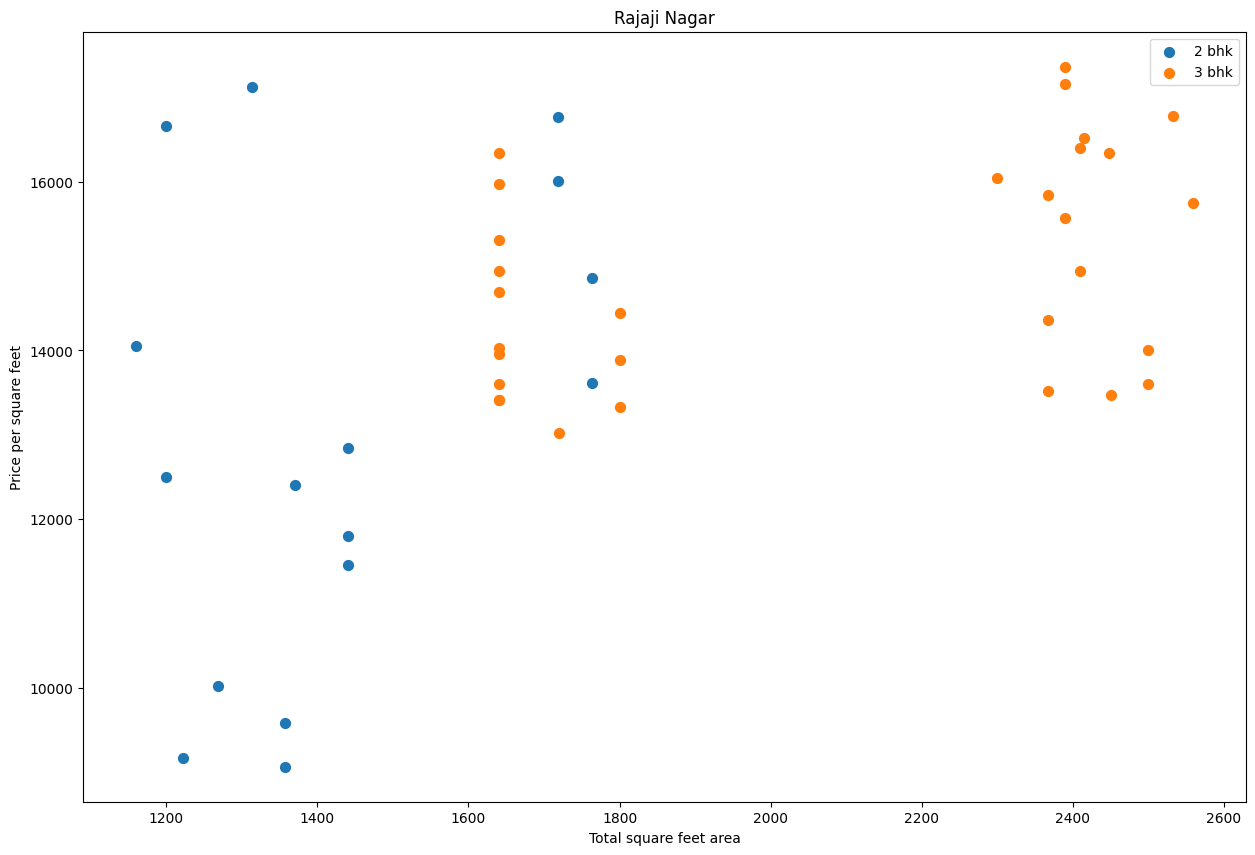

In [29]:
plot_scatter_plot(df4,"Rajaji Nagar")

Text(0, 0.5, 'Count')

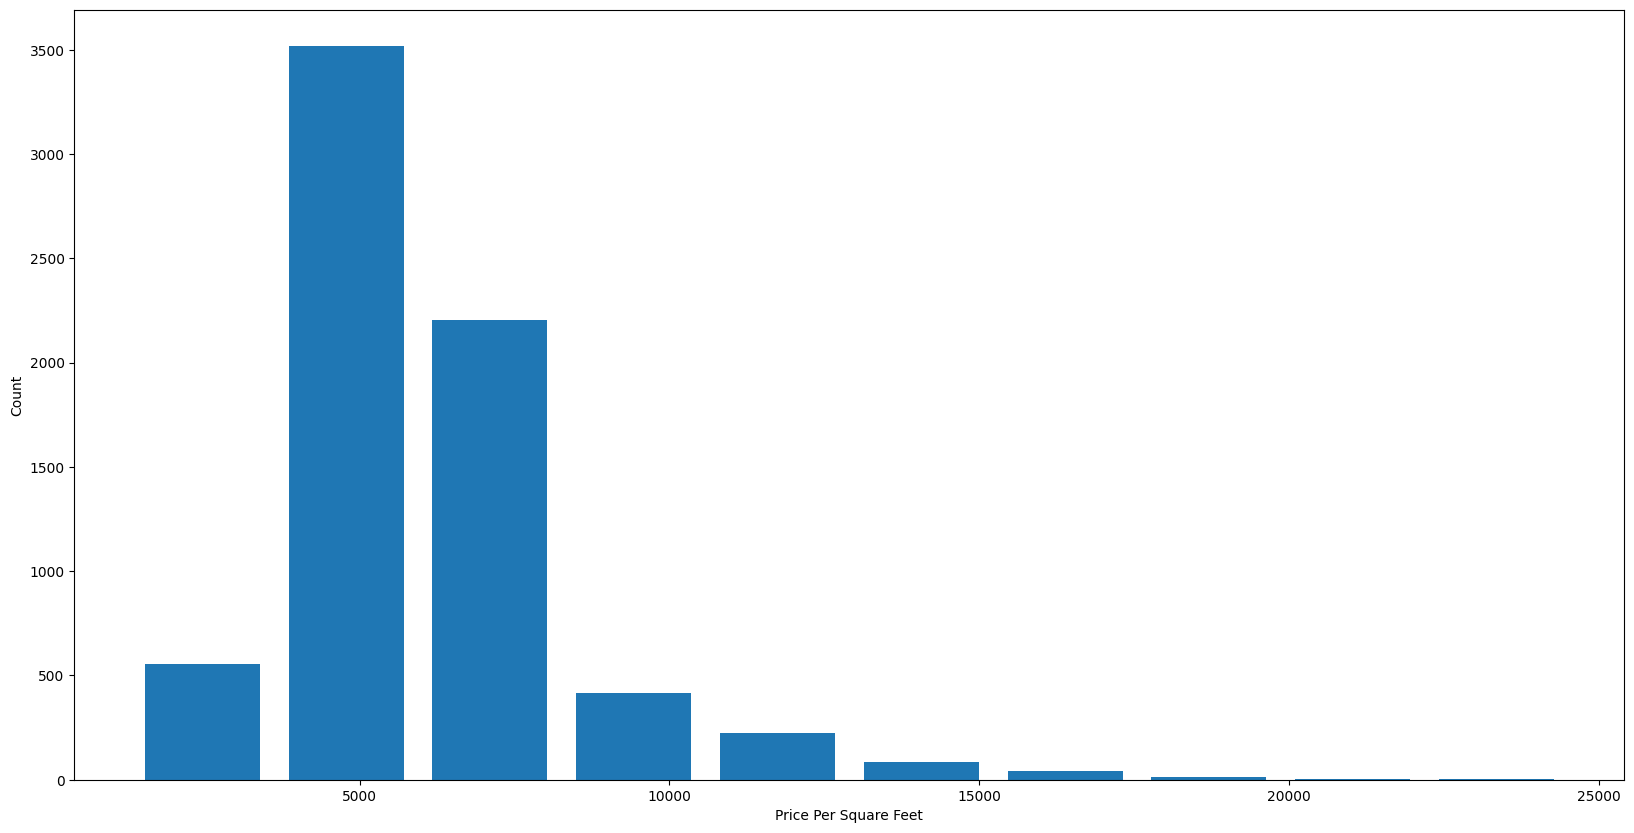

In [30]:
# Q: Why did we create this plot
# A: 
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4["Price per sqft"],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [31]:
#We are not going to use the bhk column cuz it can't be used for the below calcs. We will use the already newly created bhk_float col for this
df4 = df4[df4["bath"]<=df4["bhk_float"]+1]

In [32]:

df4 = df4.drop(['size','Price per sqft'],axis='columns')
df4.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float
1,Super built-up Area,Devarachikkanahalli,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0
2,Plot Area,Devarachikkanahalli,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0
3,Super built-up Area,Devarachikkanahalli,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0
4,Super built-up Area,Devarachikkanahalli,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0
5,Super built-up Area,Devarachikkanahalli,947,2.0,2.0,43.0,2,947.0,Devarachikkanahalli,2.0


In [33]:
# Should we drop belows too?
# df4 = df4.drop(['location','total_sqft','bhk_float'],axis='columns')

In [34]:
dummies = pd.get_dummies(df4["location_new"])
df4 = pd.concat([df4,dummies],axis='columns')
df4.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,Devarachikkanahalli,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False
2,Plot Area,Devarachikkanahalli,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Devarachikkanahalli,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False
4,Super built-up Area,Devarachikkanahalli,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0,...,False,False,False,False,False,False,False,False,False,False
5,Super built-up Area,Devarachikkanahalli,947,2.0,2.0,43.0,2,947.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,False


In [35]:
# Section 2409260950

# Method A is wrong. Since the area_type feature has values which are nominal, we can't use label encoder. We must use 1 hot encoding.
# Method B is correct to encode the categorical variable area_type (https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/)

# B
area_type_dummies = pd.get_dummies(df4.area_type)
df4 = pd.concat([df4, area_type_dummies], axis='columns')
df4 = df4.drop('Carpet  Area', axis='columns') #Ofc in here, we should drop area_type as well, but as the flow I did, I am going to drop it at the latter part of the code
df4.head()


# A
print(df4['area_type'].unique())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4['area_type'] = le.fit_transform(df4['area_type'])

print(df4['area_type'].unique())
df4.head() 



['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
[3 2 0 1]


,area_type,location,total_sqft,bath,balcony,price,bhk,new_total_sqft,location_new,bhk_float,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
1,3,Devarachikkanahalli,1250,2.0,2.0,40.0,2,1250.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,True
2,2,Devarachikkanahalli,1200,2.0,2.0,83.0,2,1200.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,True,False
3,3,Devarachikkanahalli,1170,2.0,2.0,40.0,2,1170.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,True
4,3,Devarachikkanahalli,1425,2.0,2.0,65.0,3,1425.0,Devarachikkanahalli,3.0,...,False,False,False,False,False,False,False,False,False,True
5,3,Devarachikkanahalli,947,2.0,2.0,43.0,2,947.0,Devarachikkanahalli,2.0,...,False,False,False,False,False,False,False,False,False,True


"Things to consider when Convert Categorical Variable to Numeric in Pandas? "
    https://chatgpt.com/c/66f4da18-0004-8009-bf1b-ce4aeb28edf4

In [36]:
# Q: How to use the "df.corr" for categorical variables
# A:

# Q: For both nominal and ordinal categorical variables, can we use "df.corr" thing?
# A: 

In [37]:
df4 = df4.drop('location',axis='columns')

In [38]:
df4 = df4.drop('location_new',axis='columns')
df4 = df4.drop(['total_sqft','bhk_float'],axis='columns')

In [39]:
df4.head()

,area_type,bath,balcony,price,bhk,new_total_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
1,3,2.0,2.0,40.0,2,1250.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2,2.0,2.0,83.0,2,1200.0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,2.0,2.0,40.0,2,1170.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,2.0,2.0,65.0,3,1425.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,3,2.0,2.0,43.0,2,947.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [40]:
#Q: After turned the categorical cols to numerical, we can create this ig(eventhough lec said "for categorical, we must find some other way"). And then drop the cols that are having corr value <0.1. No Boolean operators needed for this in code. Just look at the corr matrix, and then straightaway drop?
#A: No. We can't do that. Reason is, during label encoder, it gets 0,1,2,3 and this is giving a false order noh.
    # Q: So how to do it?
    # A: https://chatgpt.com/c/66f4df44-d654-8009-816a-4a0e5d89bd5c. Note: It gave a clear yet simple code. And, additionaly, I asked about the an ordinal feature too.


In [41]:
df4.corr().head(6)



,area_type,bath,balcony,price,bhk,new_total_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Plot Area,Super built-up Area
area_type,1.000000,-0.072923,0.094151,-0.054184,-0.093966,-0.068722,0.009229,0.005574,-0.027177,0.005106,...,0.036607,0.011546,0.012366,0.004825,-0.023066,0.005574,0.023643,-0.964260,-0.095142,0.911428
bath,-0.072923,1.000000,0.294331,0.605036,0.884513,0.739443,-0.012572,0.022531,0.019040,0.006544,...,-0.027998,0.082789,-0.016654,0.007496,-0.046754,-0.008165,-0.017809,0.036415,0.161397,-0.128831
balcony,0.094151,0.294331,1.000000,0.215493,0.273142,0.283698,0.013719,-0.004679,0.035731,0.005535,...,-0.043357,0.015396,0.022859,0.019893,-0.012656,0.023957,-0.006703,-0.055619,-0.160446,0.147812
price,-0.054184,0.605036,0.215493,1.000000,0.578681,0.824531,-0.018769,0.072587,0.048963,0.023574,...,-0.020705,0.077562,-0.007119,-0.010810,-0.029777,-0.016961,-0.000986,0.012295,0.184234,-0.121974
bhk,-0.093966,0.884513,0.273142,0.578681,1.000000,0.717840,-0.008027,0.031053,0.017314,-0.004641,...,-0.034751,0.057154,-0.003812,-0.002036,-0.047698,-0.011203,-0.027134,0.052662,0.177990,-0.154267
new_total_sqft,-0.068722,0.739443,0.283698,0.824531,0.717840,1.000000,-0.011311,0.025783,0.026654,0.006193,...,-0.014001,0.116966,-0.005281,0.006123,-0.039031,-0.007442,-0.015589,0.035460,0.152975,-0.121183


In [42]:
import sweetviz as sv

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
# analyze_report_with_target = sv.analyze(df1,target_feat='price')
# analyze_report_with_target.show_html('analyze_report_with_target.html', open_browser=True)

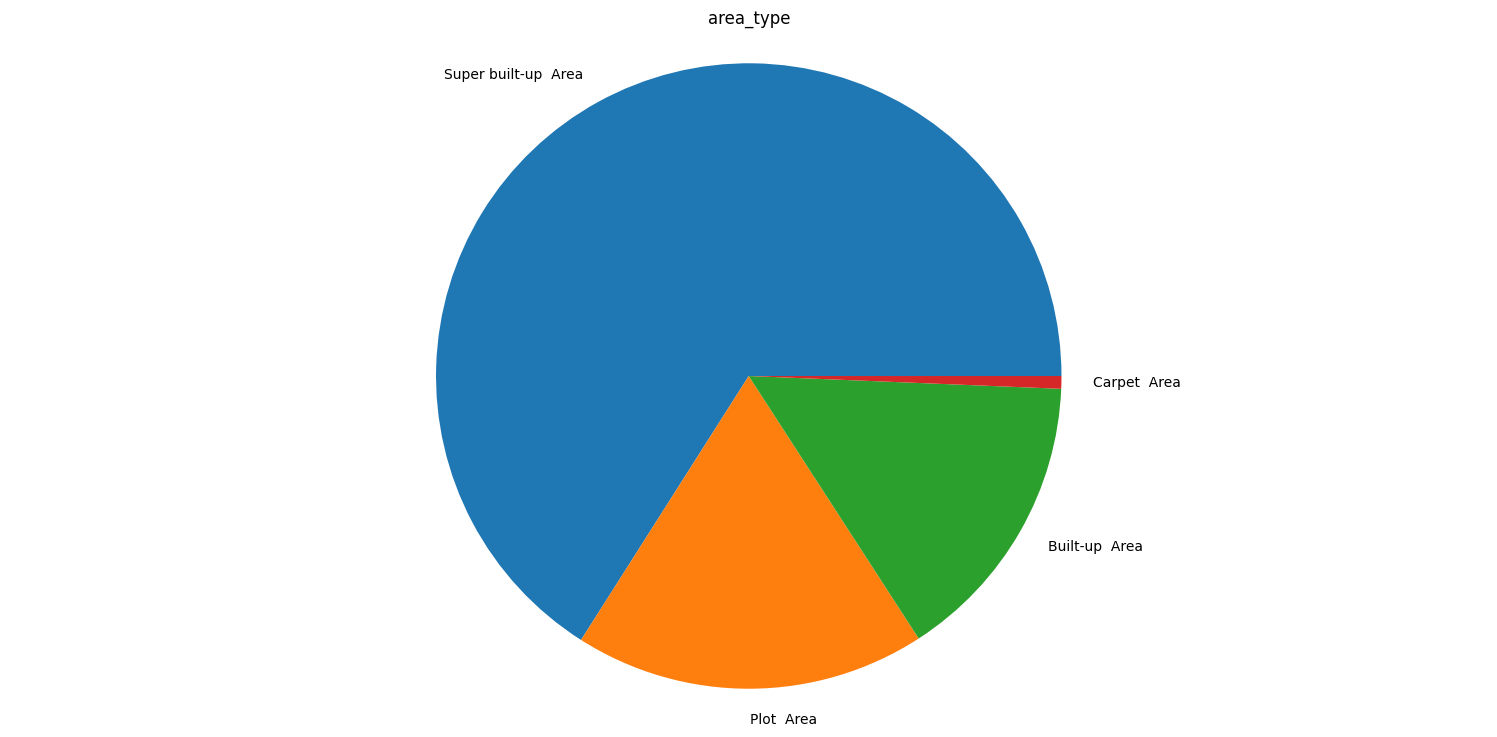

In [44]:
import matplotlib.pyplot as plt

categorical_cols_1 = ['area_type']
    #Did not add "availability" cuz so many variants
    #Did not add "location" cuz so many variants
    #Did the pie chart for "size" col after taking the integer out of it text of "bhk","bedroom". Will do in next few steps.
    #Did not do for society. Will do in next few steps
    #Did not do for "bath". Will do in next few steps
    #Did not do for balcony. WIll do in next few steps

plt.figure(figsize=(30,50))
ind = 0
for i in categorical_cols_1:
    ind = ind + 1
    plt.subplot(7,2,ind)

    plt.pie(df1[i].value_counts(), labels = df1[i].unique())

    plt.axis('equal')
    plt.title(i)

plt.tight_layout()
plt.show()

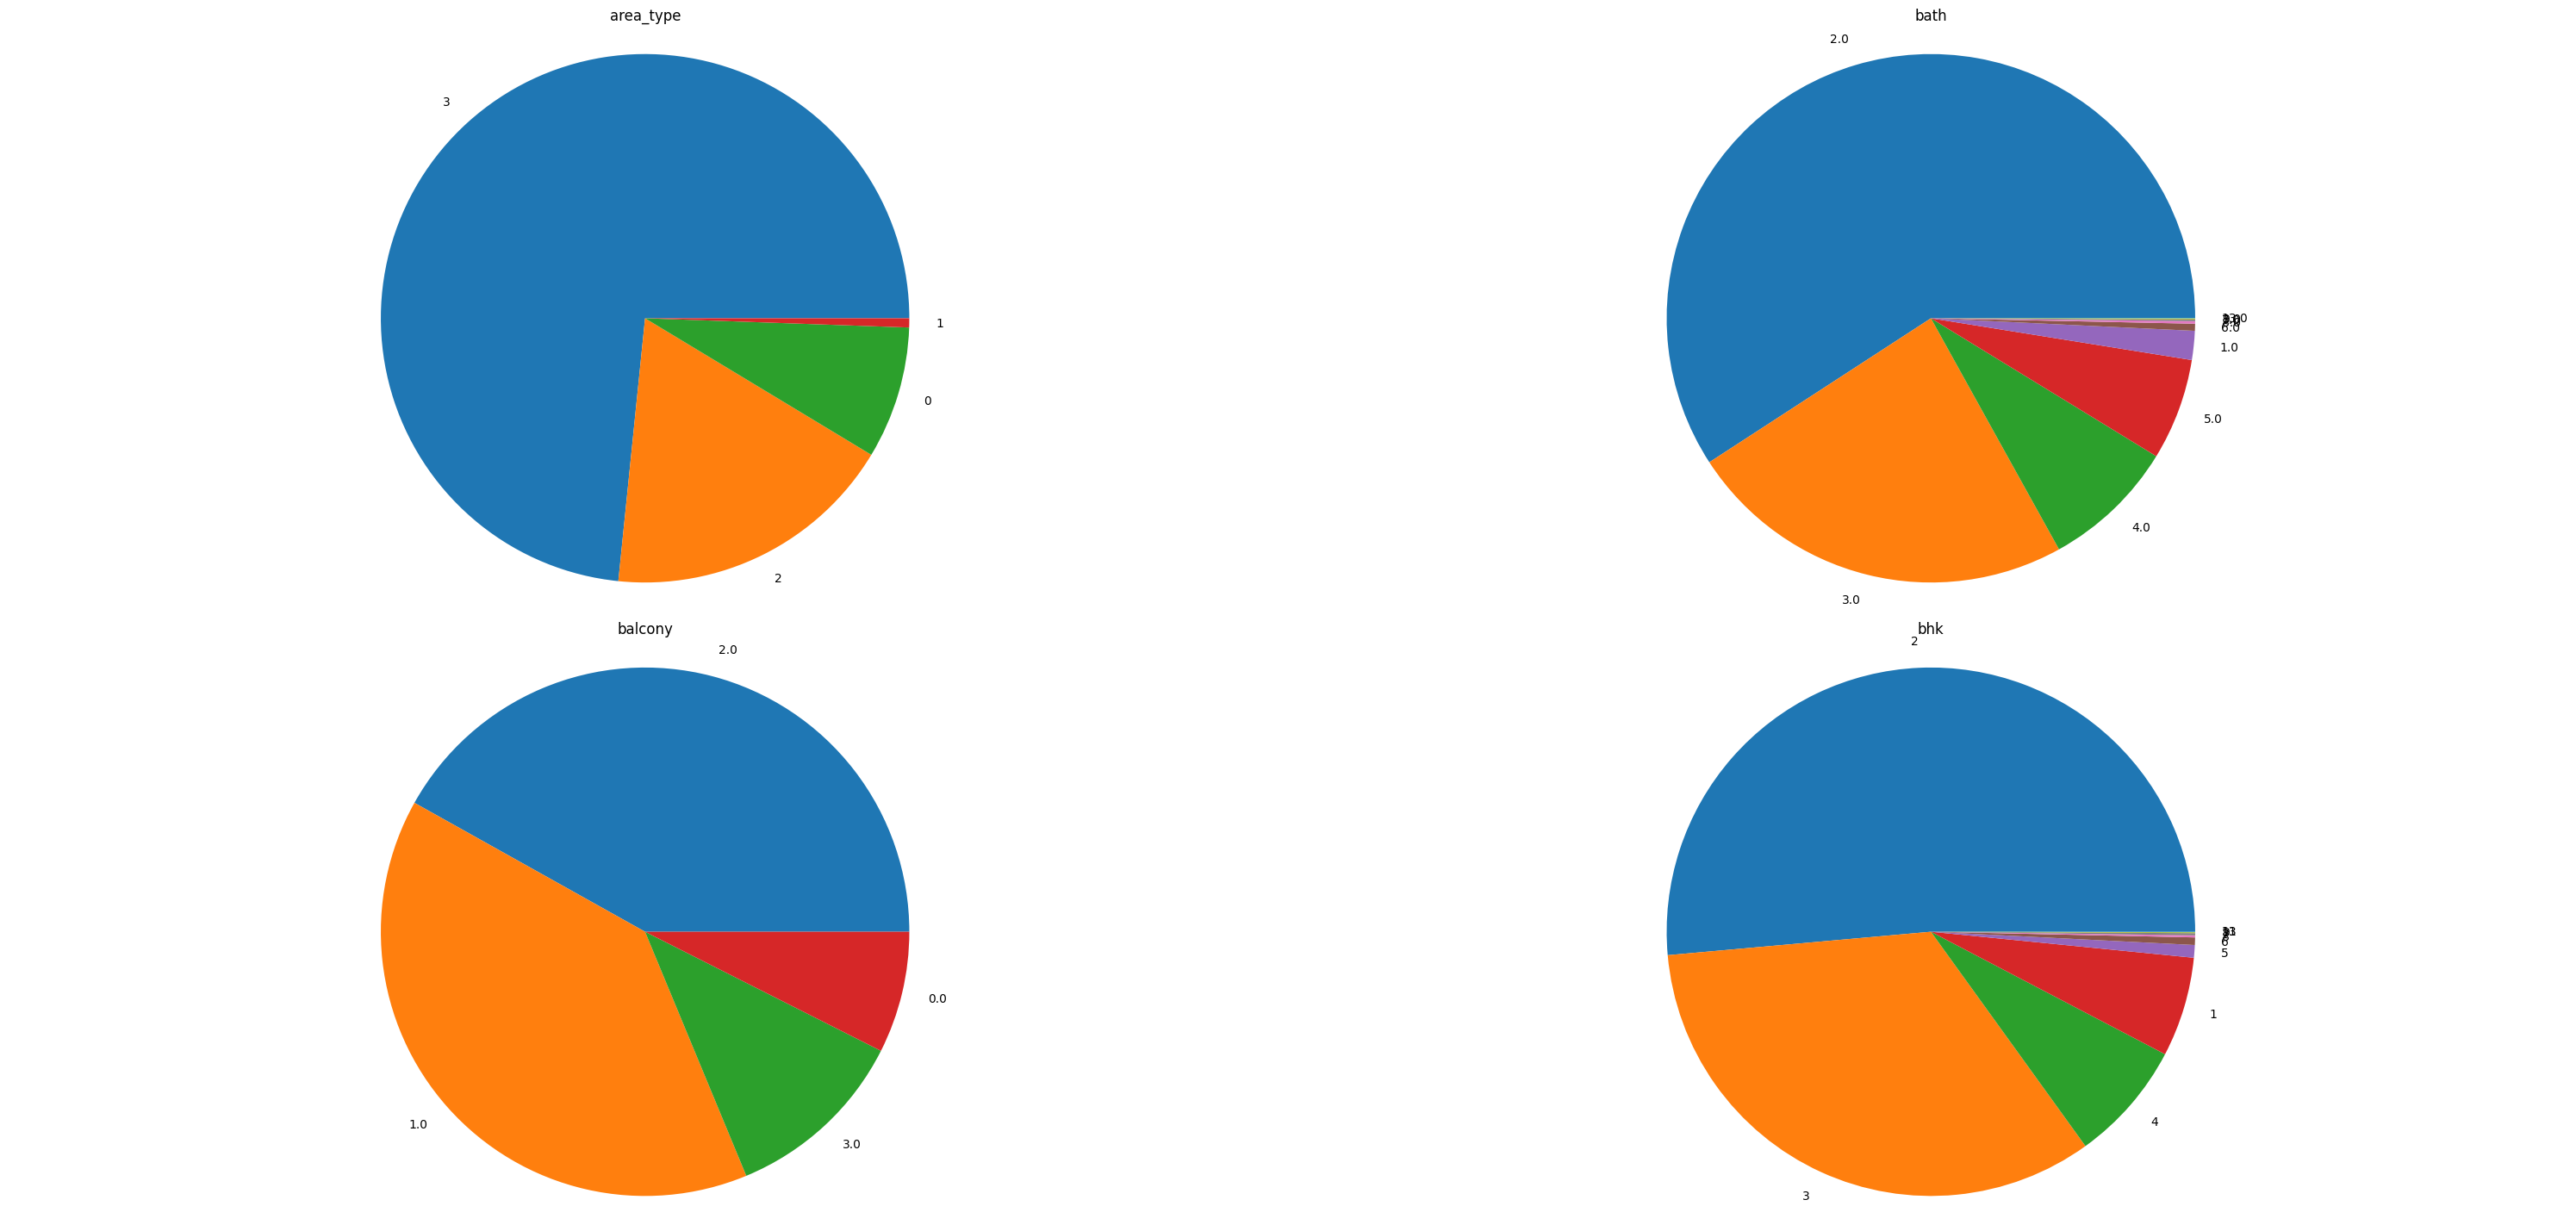

In [45]:
categorical_cols_2 = ['area_type','bath', 'balcony', 'bhk']
#Did not do for Society col cuz we dropped it cuz of having many missing values.

plt.figure(figsize=(30,50))
ind = 0
for i in categorical_cols_2:
    ind = ind + 1
    plt.subplot(7,2,ind)

    plt.pie(df4[i].value_counts(), labels = df4[i].unique())

    plt.axis('equal')
    plt.title(i)

plt.tight_layout()
plt.show()

In [46]:
df4.head()
df4.columns

Index(['area_type', 'bath', 'balcony', 'price', 'bhk', 'new_total_sqft',
       ' Devarachikkanahalli', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar',
       ...
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur', 'Built-up  Area',
       'Plot  Area', 'Super built-up  Area'],
      dtype='object', length=257)

In [47]:
#Since area_type was 1 hot encoded(since it is a categorical yet nominal we did that noh), and only "Plot Area" has the correlation value > 0.1, we drop other 2 variants.
#            	    | Built-up Area	 |  Plot Area	|  Super built-up Area
#            ____________________________________________________________
#            price	| 0.012295	     |  0.184234	|  -0.121974


df4 = df4.drop(['Built-up  Area', 'Super built-up  Area' ],axis=1)
print(df1.columns)
print(df4.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')
Index(['area_type', 'bath', 'balcony', 'price', 'bhk', 'new_total_sqft',
       ' Devarachikkanahalli', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Plot  Area'],
      dtype='object', length=255)


In [48]:
df4.head()

,area_type,bath,balcony,price,bhk,new_total_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Plot Area
1,3,2.0,2.0,40.0,2,1250.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,2.0,83.0,2,1200.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3,2.0,2.0,40.0,2,1170.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,2.0,2.0,65.0,3,1425.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,2.0,2.0,43.0,2,947.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Count of houses with that count')

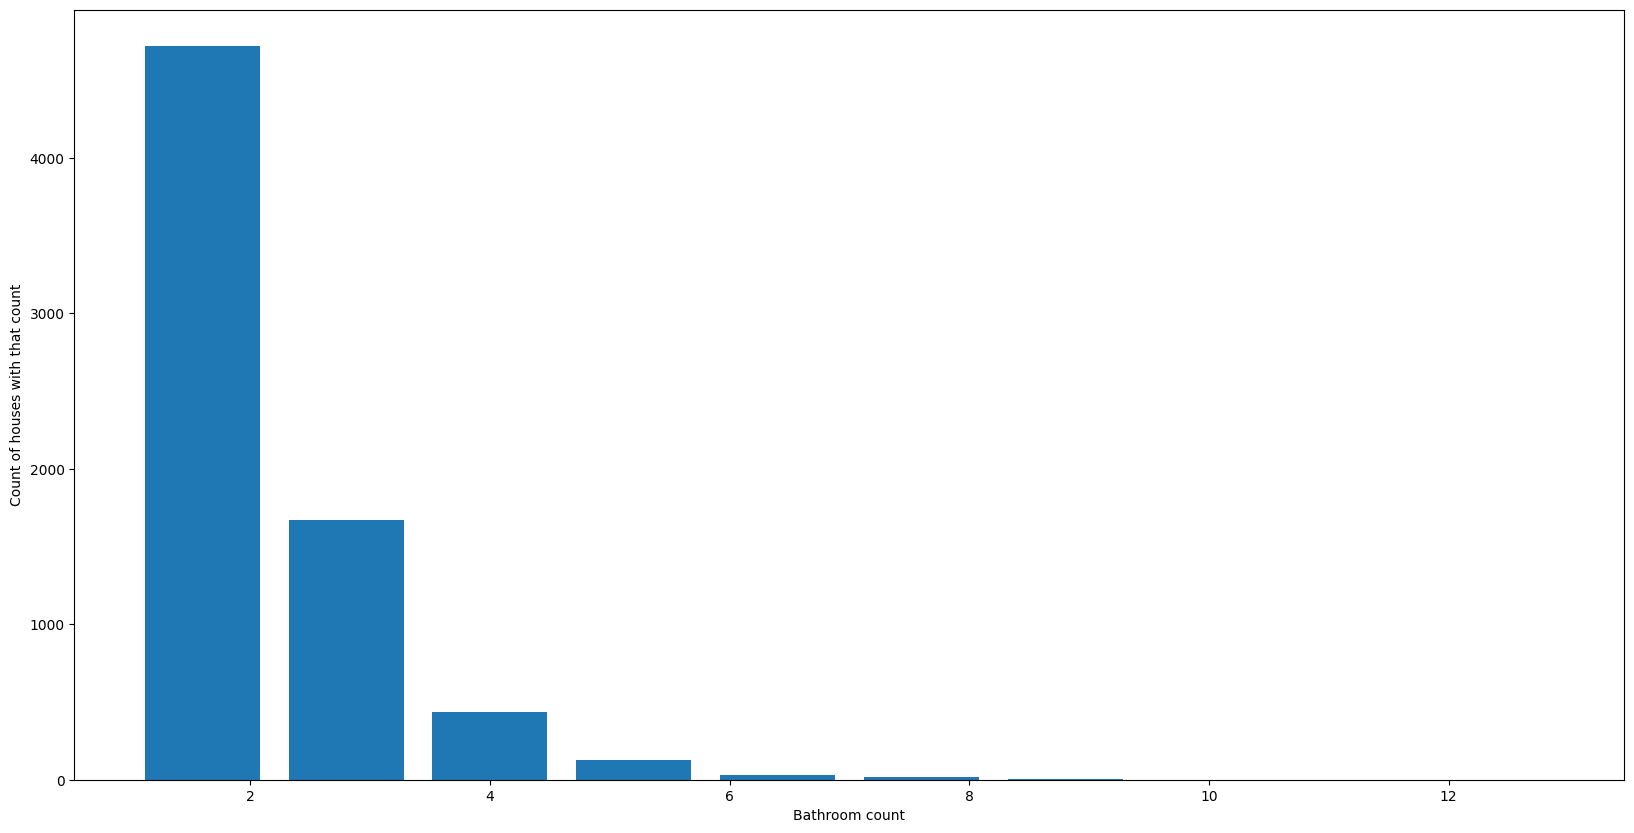

In [49]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Bathroom count")
plt.ylabel("Count of houses with that count")

In [50]:
df4.head()

,area_type,bath,balcony,price,bhk,new_total_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Plot Area
1,3,2.0,2.0,40.0,2,1250.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,2.0,83.0,2,1200.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3,2.0,2.0,40.0,2,1170.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,2.0,2.0,65.0,3,1425.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,2.0,2.0,43.0,2,947.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df4.to_csv("../data/cleaned_dataset.csv",index=False)

In [52]:
#Can check outliers in numerical cols only.
df4.columns
# Our numerical cols are "new_total_sqft", "price"?

# https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

Index(['area_type', 'bath', 'balcony', 'price', 'bhk', 'new_total_sqft',
       ' Devarachikkanahalli', '1st Block Jayanagar', '1st Block Koramangala',
       '1st Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Plot  Area'],
      dtype='object', length=255)